In [1]:
import pandas as pd
df = pd.read_csv("c:/data/iris/iris.csv")
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name',
       'Species'],
      dtype='object')

In [2]:
X=df[df.columns[:-2]]
y=df['Species']

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_score = model.decision_function(X)
print(y_score[::20])
print(model.predict(X[::20]))

[[ 6.70059602  2.86773734 -9.56833337]
 [ 5.79276224  2.99448097 -8.78724321]
 [ 6.87206743  2.75071276 -9.62278019]
 [-0.29932975  2.47880777 -2.17947802]
 [-0.95183301  2.43440741 -1.4825744 ]
 [-7.05890235  1.09066247  5.96823987]
 [-6.47727399  1.5488002   4.92847378]
 [-6.35356265  1.42564797  4.92791469]]
[0 0 0 1 1 2 2 2]


In [6]:
from sklearn.metrics import confusion_matrix
y_hat=model.predict(X_test)
confusion_matrix(y_test, y_hat)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [8]:
#roc_curve() 함수는 이진분류에만 지원됨
from sklearn.metrics import roc_curve
# fpr, tpr, thresholds = roc_curve(y,model.decision_function(X))
# fpr, tpr, thresholds
#다중 클래스에 대해서는 ROC Curve를 그릴 수 없으므로
#각각의 클래스에 대해 별도로 ROC Curve를 그려야 함
#y변수를 원핫인코딩한 리스트
from sklearn.preprocessing import label_binarize
y = label_binarize(y, classes=[0,1,2])
y[::20]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

{0: 1.0, 1: 0.46020000000000005, 2: 0.9967999999999999}


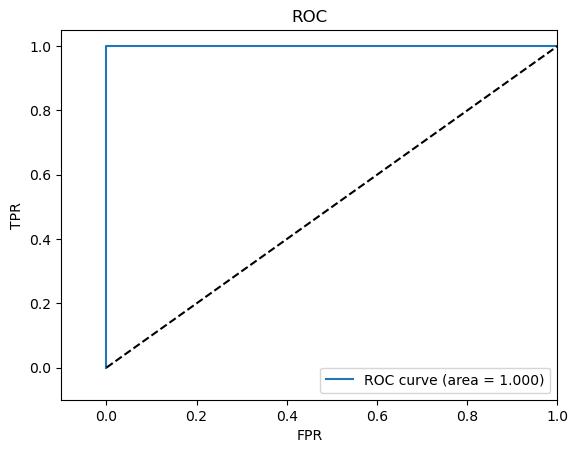

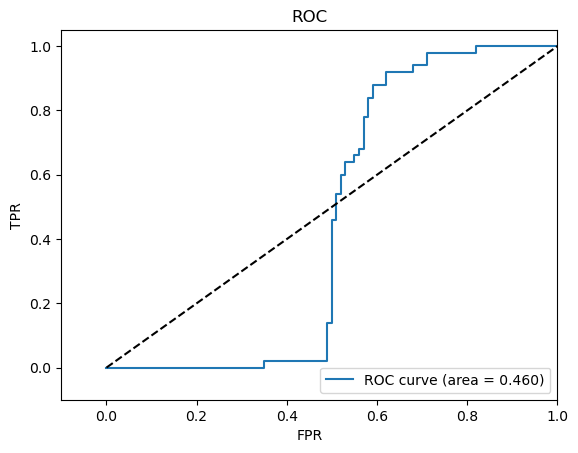

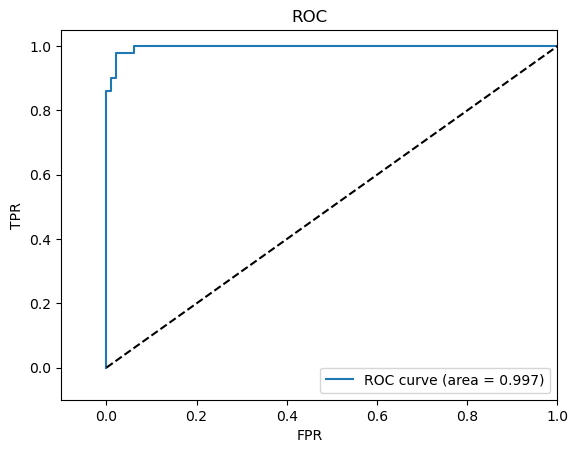

In [11]:
%matplotlib inline
from sklearn.metrics import auc
import matplotlib.pyplot as plt

n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = model.decision_function(X)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    #frp    tpr   기준(없음)
    roc_auc[i] = auc(fpr[i], tpr[i])
print(roc_auc)

for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %.3f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([-0.1, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()